# Análise Exploratória de Dados - EDA
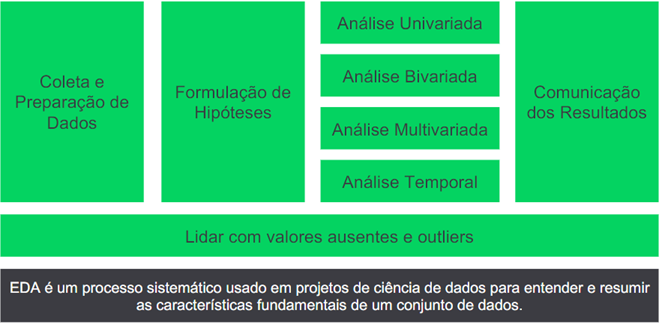

É uma etapa fundamental no processo de ciência de dados que envolve métodos estatísticos, gráficos e computacionais para explorar, resumir e entender um conjunto de dados antes de aplicar modelos mais complexos ou tomar decisões. Seu principal objetivo é identificar padrões, detectar anomalias, testar hipóteses iniciais e fornecer insights úteis para direcionar análises posteriores.

- **Entender os dados:** Conhecer a fundo as variáveis, seus tipos, distribuições, e peculiaridades.
- **Descobrir padrões:** Identificar tendências, relações entre variáveis, outliers (valores atípicos) e anomalias.
- **Formular hipóteses:** Gerar novas perguntas e hipóteses a serem testadas em etapas posteriores da análise.
- **Preparar os dados para modelagem:** Garantir que os dados estejam limpos, transformados e prontos para serem usados em algoritmos de ML ou análises mais profundas.
- **Comunicar insights:** Apresentar de forma clara e visual os principais achados e descobertas para stakeholders (partes interessadas) e outros membros da equipe.

# Coleta e Preparação de Dados - Ótimo ponto de partida
Esta é a primeira e crucial etapa. Envolve a obtenção dos dados de diversas fontes (bancos de dados, arquivos CSV, APIs, etc.) e a sua preparação para análise.

**Ações:**
1. Coleta: Reunir os dados relevantes para o problema em questão.
2. Limpeza: Corrigir erros, remover duplicatas, lidar com formatações inconsistentes.
3. Transformação: Converter tipos de dados, normalizar ou padronizar variáveis, criar novas variáveis (feature engineering).
4. Integração: Combinar dados de diferentes fontes, se necessário.
5. Refinamento: Considero essa etapa fundamental e ela está bem posicionada como o início do processo. É importante notar que a qualidade dos dados impacta diretamente a qualidade da EDA e das análises subsequentes.

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import zscore
import sweetviz as sv
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Configurações de Exibição
pd.set_option('display.max_seq_items', None)  # Exibe todas as entradas em listas e arrays
pd.set_option('display.max_rows', None)  # Exibe todas as linhas
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
pd.set_option('display.max_colwidth', None) # Exibe todo o conteúdo da célula

# Toda vez que trabalhar com número científico, podemos tranformar em um decimal para ficar mais coompreensivo
pd.set_option('display.float_format', lambda x: '%.15f' % x);

ModuleNotFoundError: No module named 'sweetviz'

## DF Contratos

In [2]:
df_contratos = pd.read_csv("datasets/churn_contracts.csv")
df_contratos.columns

Index(['customerID', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
# Renomeando as colunas
df_contratos.rename(columns={ 
    'customerID': 'ID_cliente', 
    'tenure': 'tempo_contrato', 
    'Contract': 'tipo_contrato', 
    'PaperlessBilling': 'fatura_digital', 
    'PaymentMethod': 'metodo_pagamento', 
    'MonthlyCharges': 'cobrancas_mensais', 
    'TotalCharges': 'cobrancas_totais', 
    'Churn': 'cancelamento' }, inplace=True)

df_contratos.head()

,ID_cliente,tempo_contrato,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_mensais,cobrancas_totais,cancelamento
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.950000000000003,1889.5,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.15,Yes
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.75,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.65,Yes


In [4]:
# Resumo conciso do DataFrame
df_contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_cliente         7043 non-null   object 
 1   tempo_contrato     7043 non-null   int64  
 2   tipo_contrato      7043 non-null   object 
 3   fatura_digital     7043 non-null   object 
 4   metodo_pagamento   7043 non-null   object 
 5   cobrancas_mensais  7043 non-null   float64
 6   cobrancas_totais   7043 non-null   object 
 7   cancelamento       7043 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 440.3+ KB


### Tratando valor ausente

In [5]:
# Contando strings vazias " "
valores_vazios = (df_contratos['cobrancas_totais'] == ' ').sum()
valores_vazios

11

In [6]:
# Outra forma de contar strings vazias "" excluindo os espaços entre as aspas
valores_vazios2 = df_contratos['cobrancas_totais'].str.strip().eq('').sum()
valores_vazios2

11

In [7]:
# Substituindo os valores '' por '0.0' da string para que seja possível converter para decimal 
df_contratos['cobrancas_totais'] = df_contratos['cobrancas_totais'].replace(' ', '0.0')

In [8]:
# convertendo o tipo da coluna cobrancas_totais para float64
df_contratos['cobrancas_totais'] = df_contratos['cobrancas_totais'].astype(float)
df_contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_cliente         7043 non-null   object 
 1   tempo_contrato     7043 non-null   int64  
 2   tipo_contrato      7043 non-null   object 
 3   fatura_digital     7043 non-null   object 
 4   metodo_pagamento   7043 non-null   object 
 5   cobrancas_mensais  7043 non-null   float64
 6   cobrancas_totais   7043 non-null   float64
 7   cancelamento       7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


## DF Clientes

In [9]:
df_clientes = pd.read_csv("datasets/churn_customers.csv")
df_clientes.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [10]:
df_clientes.rename(columns={ 
    'customerID': 'ID_cliente', 
    'gender': 'genero', 
    'SeniorCitizen': 'idoso', 
    'Partner': 'parceiro', 
    'Dependents': 'dependentes' }, inplace=True)

df_clientes.head()

,ID_cliente,genero,idoso,parceiro,dependentes
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [11]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_cliente   7043 non-null   object
 1   genero       7043 non-null   object
 2   idoso        7043 non-null   int64 
 3   parceiro     7043 non-null   object
 4   dependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


## DF Serviços

In [12]:
df_servicos = pd.read_csv("datasets/churn_services.csv")
df_servicos.columns

Index(['customerID', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [13]:
df_servicos.rename(columns={
    'customerID': 'ID_cliente', 
    'PhoneService': 'servico_telefonico', 
    'MultipleLines': 'linhas_multiplas', 
    'InternetService': 'servico_internet', 
    'OnlineSecurity': 'seguranca_online', 
    'OnlineBackup': 'backup_online', 
    'DeviceProtection': 'protecao_dispositivo', 
    'TechSupport': 'suporte_tecnico', 
    'StreamingTV': 'tv_streaming', 
    'StreamingMovies': 'filmes_streaming'}, inplace=True)

df_servicos.head()

,ID_cliente,servico_telefonico,linhas_multiplas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming
0,7590-VHVEG,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No


In [14]:
df_servicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID_cliente            7043 non-null   object
 1   servico_telefonico    7043 non-null   object
 2   linhas_multiplas      7043 non-null   object
 3   servico_internet      7043 non-null   object
 4   seguranca_online      7043 non-null   object
 5   backup_online         7043 non-null   object
 6   protecao_dispositivo  7043 non-null   object
 7   suporte_tecnico       7043 non-null   object
 8   tv_streaming          7043 non-null   object
 9   filmes_streaming      7043 non-null   object
dtypes: object(10)
memory usage: 550.4+ KB


## Junção dos Data Frames criando o DF_Churn

In [15]:
df_churn = df_clientes.merge(df_contratos, on='ID_cliente', how='inner').merge(df_servicos, on='ID_cliente', how='inner')
df_churn.head()

,ID_cliente,genero,idoso,parceiro,dependentes,tempo_contrato,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_mensais,cobrancas_totais,cancelamento,servico_telefonico,linhas_multiplas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming
0,7590-VHVEG,Female,0,Yes,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes,No,Fiber optic,No,No,No,No,No,No


In [16]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_cliente            7043 non-null   object 
 1   genero                7043 non-null   object 
 2   idoso                 7043 non-null   int64  
 3   parceiro              7043 non-null   object 
 4   dependentes           7043 non-null   object 
 5   tempo_contrato        7043 non-null   int64  
 6   tipo_contrato         7043 non-null   object 
 7   fatura_digital        7043 non-null   object 
 8   metodo_pagamento      7043 non-null   object 
 9   cobrancas_mensais     7043 non-null   float64
 10  cobrancas_totais      7043 non-null   float64
 11  cancelamento          7043 non-null   object 
 12  servico_telefonico    7043 non-null   object 
 13  linhas_multiplas      7043 non-null   object 
 14  servico_internet      7043 non-null   object 
 15  seguranca_online     

# Lidando com Dados Ausentes

# Formulação de Hipóteses - Posição e detalhamento importantes
Com os dados minimamente preparados, começamos a formular perguntas e hipóteses que queremos investigar. Estas hipóteses podem surgir do entendimento do problema de negócio, do conhecimento prévio sobre o domínio dos dados, ou mesmo de uma inspeção inicial dos dados.

**Ações:**

1. Brainstorming: Pensar em possíveis relações entre as variáveis, padrões esperados, ou comportamentos anômalos.
2. Definir perguntas: Formular perguntas claras e objetivas que a análise de dados pode responder.
3. Criar hipóteses: Transformar as perguntas em afirmações testáveis sobre os dados.
4. Refinamento: A posição "Formulação de Hipóteses" após a preparação de dados é lógica. Entretanto, é importante entender que a formulação de hipóteses pode ser um processo iterativo. Uma exploração inicial dos dados (antes de análises mais profundas) pode inspirar novas hipóteses. Talvez pudéssemos intitular essa etapa como "Formulação Inicial de Hipóteses" para destacar que ela pode ser refinada ao longo da EDA.

**Formulação de hipóteses do projeto**
* A faixa etária do cliente tem uma forte associação com o churn
* Um cliente que com menos de 6 meses de contrato ativo é mais propenso ao Churn
* Cliente com contratos mensais são mais propensos ao Churn

# Análise Univariada
Examina cada variável individualmente para entender sua distribuição, estatísticas descritivas (média, mediana, desvio padrão, etc.), e identificar características como assimetria, curtose.
**Técnicas:** Histogramas, boxplots, gráficos de densidade, tabelas de frequência, estatísticas descritivas.

Ela visa compreender as características individuais dessa variável, examinando sua distribuição, medidas resumo (como média e mediana), variabilidade e a presença de valores atípicos (outliers). Isso ajuda a obter uma visão detalhada das características de uma variável específica, antes de explorar relações com outras variáveis (análise bivariada ou multivariada) durante a análise de dados.


<b>Medidas de Posição: </b>Média, Mediana, Moda, Quartil e Percentil<br>
<b>Medidas de Dispersão: </b>Variância, Desvio Padrão, Amplitude, Intervalo Interquartil e Coeficiente de Variação<br>
<b>Medidas de Distribuição: </b>Assimetria, Curtose, Distribuição Normal, Distribuição Simétrica e Distribuição Assimétrica

### Distibuição de variáveis categóricas

[Text(0, 0, '5174'), Text(0, 0, '1869')]

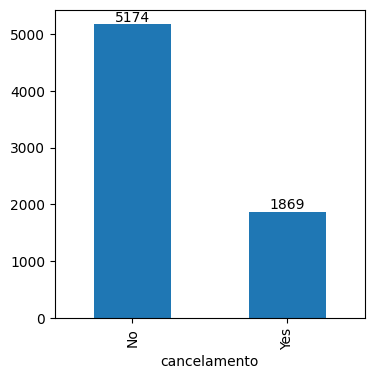

In [17]:
# Mostrando no gráfico a quantidade de churns, mas poderia ser o porcentual
plt.figure(figsize=(4,4))
df_churn.cancelamento.value_counts().plot.bar()
plt.bar_label(plt.gca().containers[0])

[Text(0, 0, '3875'), Text(0, 0, '1695'), Text(0, 0, '1473')]

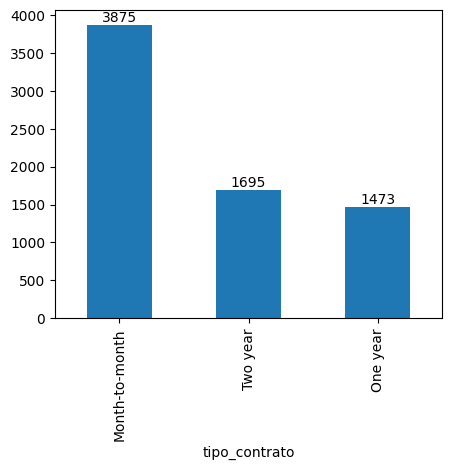

In [18]:
# Mostrando no gráfico a quantidade de tipos de contratos, mas poderia ser o porcentual
plt.figure(figsize=(5,4))
df_churn.tipo_contrato.value_counts().plot.bar()
plt.bar_label(plt.gca().containers[0])

### Distibuição de variáveis numéricas

[Text(0, 0, '5901'), Text(0, 0, '1142')]

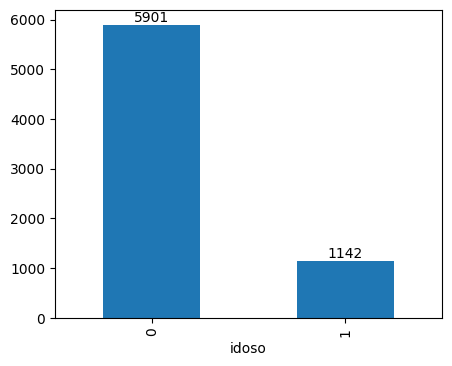

In [19]:
plt.figure(figsize=(5,4))
df_churn.idoso.value_counts().plot.bar()
plt.bar_label(plt.gca().containers[0])

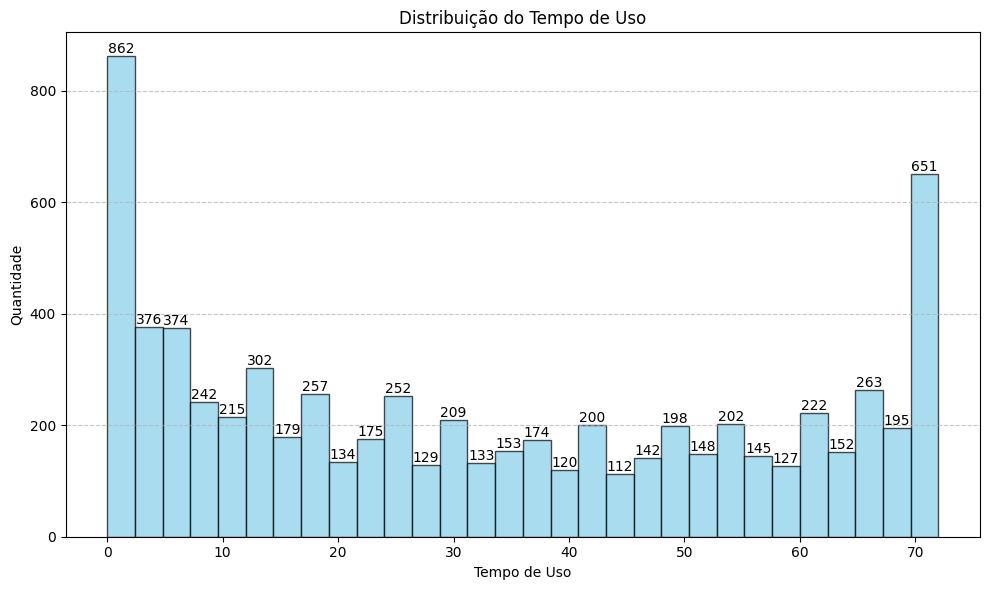

In [20]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_churn.tempo_contrato, bins=30, edgecolor='black', color='skyblue', alpha=0.7)

# Adicionar labels no topo de cada barra
for i in range(len(patches)):
   height = patches[i].get_height()
   plt.text(bins[i] + (bins[i+1] - bins[i])/2, 
            height, 
            int(height),  # Converte para inteiro
            ha='center',  # Alinhamento horizontal centralizado
            va='bottom')  # Posicionado na base do texto

plt.title('Distribuição do Tempo de Uso')
plt.xlabel('Tempo de Uso')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

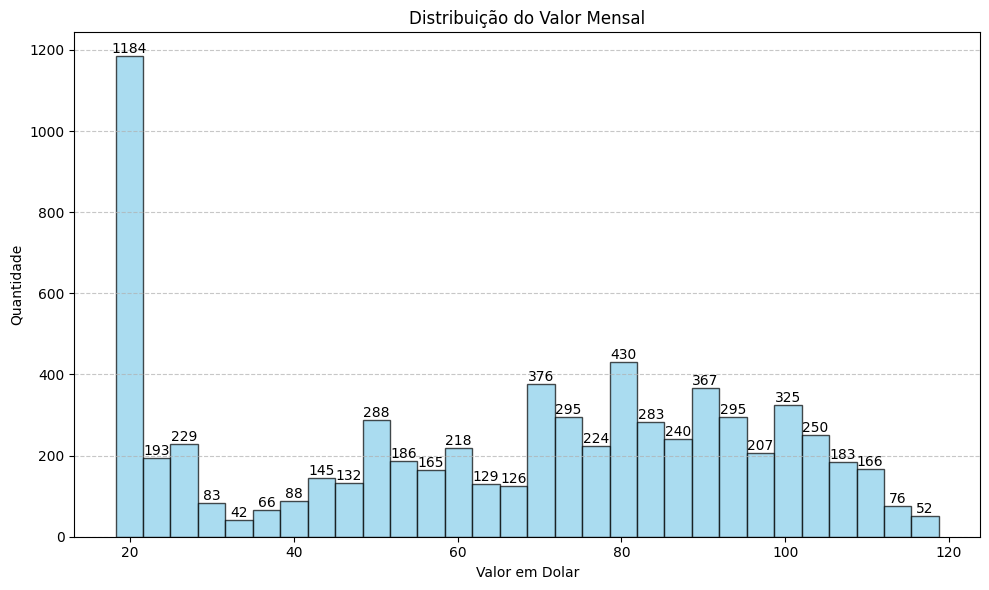

In [21]:
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_churn.cobrancas_mensais, bins=30, edgecolor='black', color='skyblue', alpha=0.7)

# Adicionar labels no topo de cada barra
for i in range(len(patches)):
   height = patches[i].get_height()
   plt.text(bins[i] + (bins[i+1] - bins[i])/2, 
            height, 
            int(height),  # Converte para inteiro
            ha='center',  # Alinhamento horizontal centralizado
            va='bottom')  # Posicionado na base do texto

plt.title('Distribuição do Valor Mensal')
plt.xlabel('Valor em Dolar')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análise Bivariada
Investiga a relação entre pares de variáveis. Busca identificar correlações, associações, e dependências.

Busca entender como uma variável está relacionada à outra, frequentemente usando gráficos, tabelas cruzadas e cálculos de correlação. Isso ajuda a identificar padrões, associações e dependências entre as duas variáveis, fornecendo insights sobre como elas interagem, o que é crucial na análise de dados e na tomada de decisões informadas.

**Técnicas:** Scatter plots (gráficos de dispersão), boxplots agrupados, tabelas de contingência, coeficientes de correlação.



* **Hipótese:** Cliente com contratos mensais são mais propensos ao Churn?

### Tabela De Contingência
A tabela de contingência é para analisar a relação entre duas variáveis categóricas. Utilizamos o método pd.crosstab para criar a tabela cruzada e contar a quantidade de clientes em cada combinação de categorias. 

In [22]:
# Contruir uma tabela entre Tipo de Contrato e Churn - Quantidade
pd.crosstab(df_churn.cancelamento, df_churn.tipo_contrato, margins=True, margins_name='Total')

tipo_contrato,Month-to-month,One year,Two year,Total
cancelamento,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
Total,3875,1473,1695,7043


In [23]:
# Contruir uma tabela entre Tipo de Contrato e Churn - Prorpoção
pd.crosstab(df_churn.cancelamento, df_churn.tipo_contrato, normalize=True, margins=True, margins_name='Total')

tipo_contrato,Month-to-month,One year,Two year,Total
cancelamento,,,,
No,0.315206588101661,0.185574329121113,0.233849211983530,0.734630129206304
Yes,0.234985091580292,0.023569501632827,0.006815277580576,0.265369870793696
Total,0.550191679681954,0.209143830753940,0.240664489564106,1.000000000000000


In [24]:
# Contruir uma tabela entre Tipo de Contrato e Churn - Prorpoção
pd.crosstab(df_churn.cancelamento, df_churn.tipo_contrato, normalize='index', margins=True, margins_name='Total')

tipo_contrato,Month-to-month,One year,Two year
cancelamento,,,
No,0.429068419018168,0.252609199845381,0.318322381136452
Yes,0.885500267522739,0.088817549491707,0.025682182985554
Total,0.550191679681954,0.209143830753940,0.240664489564106


Considerando o público total, os clientes de contrato mensal representam 55%. Porém, se considerarmos apenas os clientes que abandonaram o serviço, 88% tinham contrato mensal. Desta forma, podemos afirmar que há uma correlação entre o tipo de contrato mensal e o abandono.

In [25]:
# Contruir uma tabela de contingencia entre tipo de contrato e churn (Proporção isolada)
# Dessa forma o Total mantém a informação, mas isola por resultado do Churn, ou seja, somando cada linha resulta em 100%
# ---------------- INFORMAÇÕES QUE OBTEMOS COM ESSA ANÁLISE -------------------------
# Considerando o público total, os clientes de contrato mensal representa 55%. 
# Porém, se considerar apenas os clientes que abandonou o serviço, 88% tinham contrato mensal.
# Dessa forma podemos afirmar que há uma correlação entre o tipo de contrato mensal e o abandono.
pd.crosstab(df_churn.cancelamento, df_churn.tipo_contrato, normalize='index', margins=True, margins_name='Total')*100

tipo_contrato,Month-to-month,One year,Two year
cancelamento,,,
No,42.906841901816776,25.260919984538077,31.832238113645150
Yes,88.550026752273951,8.881754949170679,2.568218298555377
Total,55.019167968195369,20.914383075394007,24.066448956410621


### Teste de Hipótese
Correlação de variáveis qualitativas
- Avaliar a correlação entre dias variáveis categóricas (qualitativas)
- Executar teste de hipótese chamado Chi-Square ou Qui-Quadrado de Pearson
- Em um teste de hipótese, duas hipóteses são formuladas: 
1. **H0** (Hipótese nula): as duas variáveis são idenpendentes
2. **H1** (Hipótese complementar): as duas variáveis são denpendentes
- O conceito de um **Teste de Hipótese** é recusar ou confirmar a **Hipótese Nula (H0)** , ou seja se recusar o H0, considera o H1 e vice-versa.
- P-Value (por convenção é: 0.05, mas dependendo do caso pode ser mudado): Se H0 < p-value, recusamos a hipótese nula (H0) e seguimos com a complementar (H1).


In [26]:
# Gerar um DF da Crosstab sem totais (tabela de contingência)
df_crosstab_churn_contracts = pd.crosstab(df_churn.cancelamento, df_churn.tipo_contrato)

### Calcular o Scores e P-Values

In [27]:
# O resultado do chi2_contingency é uma Tupla = Lista imutável
# statistic (Qui-Quadrado) | pvalue | dof (Graus de liberdade) | expected_freq (Frequência esperada)
chi_scores_churn_contract = chi2_contingency(df_crosstab_churn_contracts)
chi_scores_churn_contract

Chi2ContingencyResult(statistic=1184.5965720837926, pvalue=5.863038300673391e-258, dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

In [28]:
# Score
scores_churn_contract = pd.Series(chi_scores_churn_contract[0])
scores_churn_contract

0   1184.596572083792580
dtype: float64

In [29]:
# P-Value
pvalues_churn_contract = pd.Series(chi_scores_churn_contract[1])
pvalues_churn_contract

0   0.000000000000000
dtype: float64

In [30]:
# Para facilitar a visualização criaremos duas séries e converteremos para DF.
df_chi_scores_churn_contract = pd.DataFrame('Qui2': chi_scores_churn_contract[1])
scores_churn_contract

SyntaxError: invalid syntax (398823994.py, line 2)

In [ ]:
# Criar DF com o resultado e analisar Scores e P-Value
# Conforme Teste Estatístico (Chi-Square): P-Value é <= 0.05, então rejeitamos H0 e consideramos o H1, ou seja, as variáveis são dependentes.
# Pelo Qui2 alto, podemos afirmar que há uma forte correlação.
df_chi_scores_churn_contracts = pd.DataFrame({'Qui2': scores_churn_contract, 'P-Value': pvalues_churn_contract})
df_chi_scores_churn_contracts

,Qui2,P-Value
0,1184.596572083792580,0.000000000000000


### Correlação de Variável Qualitativa e Quantitativa
Para fazer a análise de correlação entre uma variável qualitativa e uma variável quantitativa, utilizamos o teste de **Chi-Square**.
1. transformar a variável quantitativa em uma variável qualitativa, criando uma nova coluna no DataFrame, onde os valores serão "yes" para clientes com menos de 6 meses de contrato e "no" para clientes com 6 meses ou mais. 
2. Fazer a análise de correlação usando o teste de Chi-Square e verificar se há uma correlação significativa entre churn e tempo de contrato inferior a 6 meses.

Concluímos que a correlação entre churn e tempo de contrato é menor do que a correlação entre churn e tipo de contrato.<br>
- Usar o mesmo **Teste de Chi-Square**, mas antes transformar a variável quantitativa em qualitativa
- **Próxima Hipótese**: Clientes com menos de 6 meses de contrato é mais propenso ao churn?

In [ ]:
# Transformando a variável quantitativa em uma variável qualitativa
df_churn['ContratoMenor6Meses'] = np.where(df_churn['tempo_contrato'] < 6, 'Yes', 'No')
df_churn.head()

,ID_cliente,genero,idoso,parceiro,dependentes,tempo_contrato,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_mensais,cobrancas_totais,cancelamento,servico_telefonico,linhas_multiplas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,ContratoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,No,No phone service,DSL,No,Yes,No,No,No,No,Yes
1,5575-GNVDE,Male,0,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,Yes,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes
3,7795-CFOCW,Male,0,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,Female,0,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [ ]:
# Gerando a tabela cruzada para fazer o teste de hipótese sem total
df_crosstab_churn_tenure = pd.crosstab(df_churn.cancelamento, df_churn.ContratoMenor6Meses)
df_crosstab_churn_tenure


ContratoMenor6Meses,No,Yes
cancelamento,,
No,4547,627
Yes,1125,744


In [ ]:
# Calcular os scores
# statistic (Qui-Quadrado) | pvalue | dof (Graus de liberdade) | expected_freq (Frequência esperada)
chi_scores_churn_tenure = chi2_contingency(df_crosstab_churn_tenure)
chi_scores_churn_tenure

Chi2ContingencyResult(statistic=669.7216158287102, pvalue=1.1485390172689518e-147, dof=1, expected_freq=array([[4166.82209286, 1007.17790714],
       [1505.17790714,  363.82209286]]))

In [ ]:
scores_churn_tenure = pd.Series(chi_scores_churn_tenure[0])
scores_churn_tenure

0   669.721615828710242
dtype: float64

In [ ]:
pvalue_churn_tenure = pd.Series(chi_scores_churn_tenure[1])
pvalue_churn_tenure

0   0.000000000000000
dtype: float64

In [ ]:
# Criar DF com o resultado e analisar Scores e P-Value
# Conforme Teste Estatístico (Chi-Square): P-Value é <= 0.05, então rejeitamos H0 e consideramos o H1, ou seja, as variáveis são dependentes.
# Com base do Qui2 resultante das duas análises, podemos afirmar que a correlação entre cancelamento (churn) e ContratoMenor6Meses é menor que a correlação entre churn e tipo_contrato.
df_chi_scores_churn_tenure = pd.DataFrame({'Qui2': scores_churn_tenure, 'P-Value': pvalue_churn_tenure})
df_chi_scores_churn_tenure

,Qui2,P-Value
0,669.721615828710242,0.000000000000000


### Correlação entre variáveis numéricas (Quantitativas) - Person e Spearman
Calcularemos a correlação das variáveis numéricas tempo_contrato e cobranca_total para ilustrar a intuição de que quanto maior o tempo de contrato, maior o valor pago. 
Para fazer o cálculo usamos o **coeficiente de correlação de Pearson** e também o método **Spearman**, que captura correlações não lineares.

In [ ]:
# Correlação entre duas variáveis numéricas - Person
# O resultado: 0.826178397950242 mostra uma forte correlação
df_churn.tempo_contrato.corr(df_churn.cobrancas_totais)

0.826178397950242

In [ ]:
# Correlação entre duas variáveis numéricas - Spearman
# O resultado: 0.8896957900597577 também mostra uma forte correlação
df_churn.tempo_contrato.corr(df_churn.cobrancas_totais, method='spearman')

0.8896957900597577

Ambos os métodos mostraram uma forte correlação positiva entre as variáveis. Além disso, apresentamos um gráfico de dispersão para visualizar essa tendência. Propus dois desafios para validar hipóteses relacionadas à faixa etária do cliente e ao contrato mensal. Esses desafios podem ser trabalhados utilizando as técnicas aprendidas nesta aula.<br>

- TempoUso(Tenure) com TotalPagamentos(TotalCharges)
- Depois de analisar abaixo a correlação entre as duas variáveis usando os métodos de Person e Spearman<br>
concluímos que há uma forte relação entre as duas variáveis

### Gráfico de Dispersão - Plot Scater

<Axes: xlabel='tempo_contrato', ylabel='cobrancas_totais'>

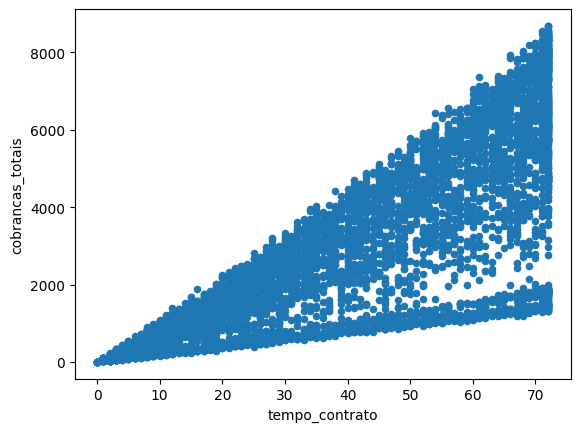

In [ ]:
# Quanto maior o tempo de contrato maior o total pago
df_churn.plot.scatter(x='tempo_contrato', y='cobrancas_totais')

### Desafio 1: Validar a primeira hipótese de que a faixa etária do cliente tem uma forte associação com o Churn

In [ ]:
df_crosstab_churn_idoso = pd.crosstab(df_churn.cancelamento, df_churn.idoso)
df_crosstab_churn_idoso

idoso,0,1
cancelamento,,
No,4508,666
Yes,1393,476


In [ ]:
chi_scores_churn_idoso = chi2_contingency(df_crosstab_churn_idoso)
chi_scores_churn_idoso

Chi2ContingencyResult(statistic=159.42630036838742, pvalue=1.510066805092378e-36, dof=1, expected_freq=array([[4335.05239245,  838.94760755],
       [1565.94760755,  303.05239245]]))

In [ ]:
scores_churn_idoso = pd.Series(chi_scores_churn_idoso[0])
scores_churn_idoso

0   159.426300368387416
dtype: float64

In [ ]:
scores_churn_idoso = pd.Series(chi_scores_churn_idoso[1])
scores_churn_idoso

0   0.000000000000000
dtype: float64

Como o P-Value <= 0.05, rejeitamos a H0 e consideramos H1 que indica que há uma forte relação entre as variáveis idoso com churn

### Desafio 2: Validar com teste de hipótese se contrato mensal está mais propenso ao churn

In [ ]:
# Transformando a variável quantitativa em uma variável qualitativa
df_churn['ContratoMensal'] = np.where(df_churn['tipo_contrato'] == 'Month-to-month', 'Yes', 'No')
df_churn.head()

,ID_cliente,genero,idoso,parceiro,dependentes,tempo_contrato,tipo_contrato,fatura_digital,metodo_pagamento,cobrancas_mensais,cobrancas_totais,cancelamento,servico_telefonico,linhas_multiplas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,ContratoMenor6Meses,ContratoMensal
0,7590-VHVEG,Female,0,Yes,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Yes
1,5575-GNVDE,Male,0,No,No,34,One year,No,Mailed check,56.950000000000003,1889.500000000000000,No,Yes,No,DSL,Yes,No,Yes,No,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Yes
3,7795-CFOCW,Male,0,No,No,45,One year,No,Bank transfer (automatic),42.299999999999997,1840.750000000000000,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,No
4,9237-HQITU,Female,0,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Yes


In [ ]:
# Gerando a tabela cruzada para fazer o teste de hipótese sem total
df_crosstab_churn_tempo_contrato = pd.crosstab(df_churn.cancelamento, df_churn.ContratoMensal)
df_crosstab_churn_tempo_contrato

ContratoMensal,No,Yes
cancelamento,,
No,2954,2220
Yes,214,1655


In [ ]:
chi_scores_churn_tempo_contrato = chi2_contingency(df_crosstab_churn_tempo_contrato)
chi_scores_churn_tempo_contrato

Chi2ContingencyResult(statistic=1153.971661109348, pvalue=6.147585925548493e-253, dof=1, expected_freq=array([[2327.30824933, 2846.69175067],
       [ 840.69175067, 1028.30824933]]))

In [ ]:
# Scores
scores_churn_tempo_contrato = pd.Series(chi_scores_churn_tempo_contrato[0])
scores_churn_tempo_contrato

0   1153.971661109347906
dtype: float64

In [ ]:
# P-Value
pvalue_churn_tempo_contrato = pd.Series(chi_scores_churn_tempo_contrato[1])
pvalue_churn_tempo_contrato

0   0.000000000000000
dtype: float64

Conforme Teste Estatístico (Chi-Square): P-Value é <= 0.05, então rejeitamos H0 e consideramos o H1, ou seja, as variáveis são dependentes.

# Análise Multivariada
Analisa as relações entre múltiplas variáveis simultaneamente. Permite identificar padrões mais complexos e interações entre as variáveis.

**Técnicas:** Pair plots (matrizes de dispersão), mapas de calor de correlação, análise de componentes principais (PCA), técnicas de clustering.

# Análise Temporal
Se os dados possuem uma dimensão temporal, essa análise explora tendências, sazonalidades, ciclos e padrões ao longo do tempo.

**Técnicas:** Gráficos de linha temporal, decomposição sazonal, autocorrelação, análise de séries temporais.


# Conclusão dos Tipos de Análises 
A divisão em tipos de análise (univariada, bivariada, etc.) é excelente para organizar o processo de EDA. A ordem geralmente é lógica: começar pelo univariado para entender as variáveis individualmente, depois bivariado para relações simples, e por fim multivariado para interações complexas. A análise temporal é condicional à natureza dos dados, mas crucial quando aplicável.

# Lidando com os Outliers
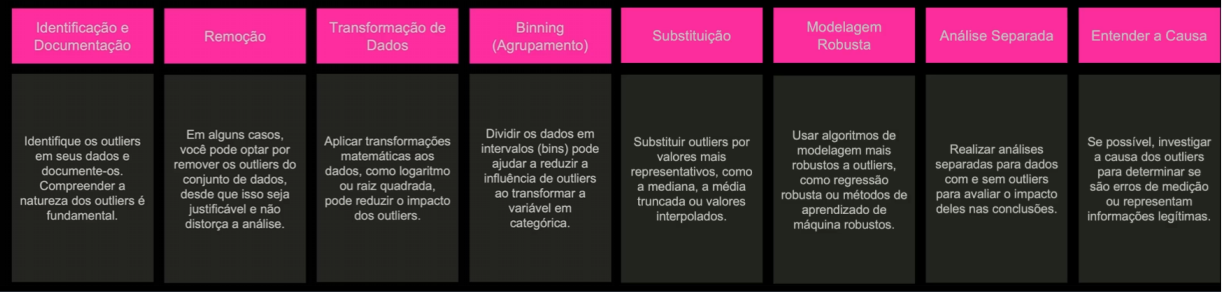

In [32]:
df_churn.columns

Index(['ID_cliente', 'genero', 'idoso', 'parceiro', 'dependentes',
       'tempo_contrato', 'tipo_contrato', 'fatura_digital', 'metodo_pagamento',
       'cobrancas_mensais', 'cobrancas_totais', 'cancelamento',
       'servico_telefonico', 'linhas_multiplas', 'servico_internet',
       'seguranca_online', 'backup_online', 'protecao_dispositivo',
       'suporte_tecnico', 'tv_streaming', 'filmes_streaming'],
      dtype='object')

<Axes: >

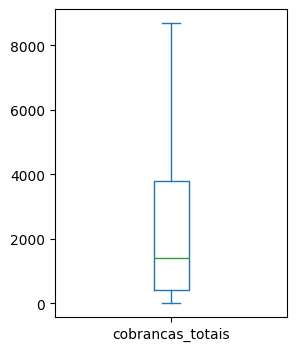

In [ ]:
# Box plot todos os TotalPagamentos sem agrupar
ax = df_churn.cobrancas_totais.plot.box()
ax.figure.set_size_inches(3, 4)
ax

cobrancas_totais    Axes(0.125,0.11;0.775x0.77)
dtype: object

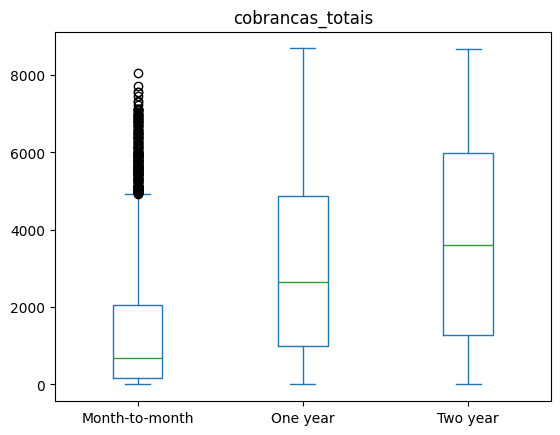

In [ ]:
# Box Plot agrupado por Contrato
df_churn.plot.box(column='cobrancas_totais', by='tipo_contrato')


.

In [ ]:
# Criar DF somente com clientes com contrato do tipó Month-to-Month
df_churn_month = df_churn[df_churn.tipo_contrato == 'Month-to-month']
df_churn_month.tipo_contrato.value_counts()

tipo_contrato
Month-to-month    3875
Name: count, dtype: int64

<Axes: >

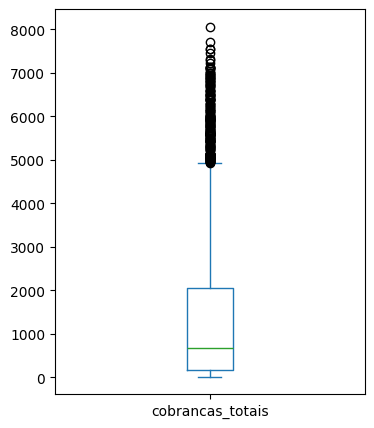

In [39]:
# Box Plot apenas dos contratos Month-to-Month
ax = df_churn_month.cobrancas_totais.plot.box()
ax.figure.set_size_inches(4, 5)
ax

### Método de Tukey - IQR ou IIQ (Distribuição não normal)